In [1]:
#Perform EDA on the given dataset(Social Network Ads Dataset)
import pandas as pd

file_path = "C:\\Users\\CVR\\Downloads\\Social_Network_Ads.csv"
df = pd.read_csv(file_path)

print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


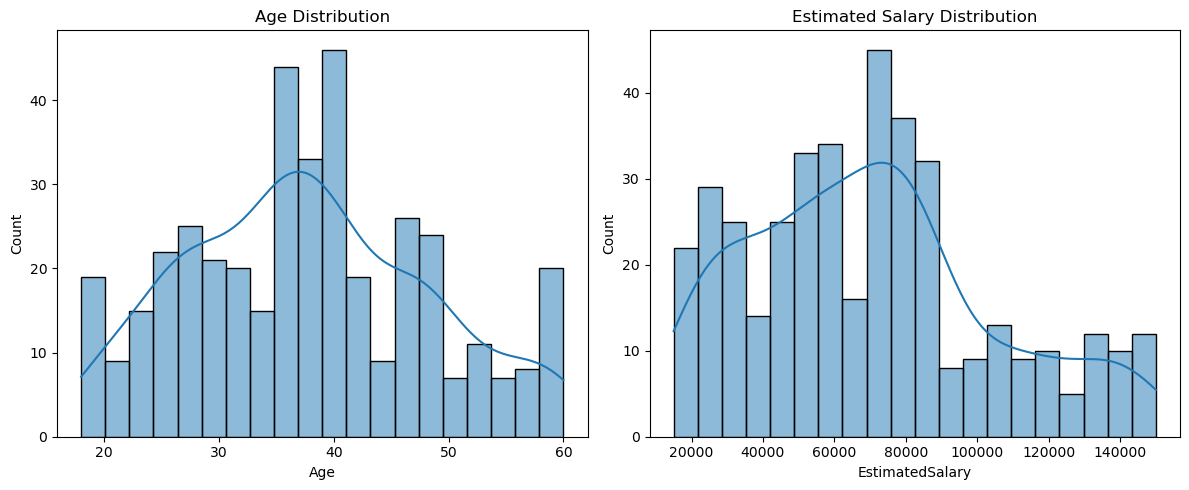

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

summary_stats = df.describe()

# Visualizing distributions of Age and EstimatedSalary
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df["Age"], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Age Distribution")
sns.histplot(df["EstimatedSalary"], bins=20, kde=True, ax=axes[1])
axes[1].set_title("Estimated Salary Distribution")
plt.tight_layout()

summary_stats


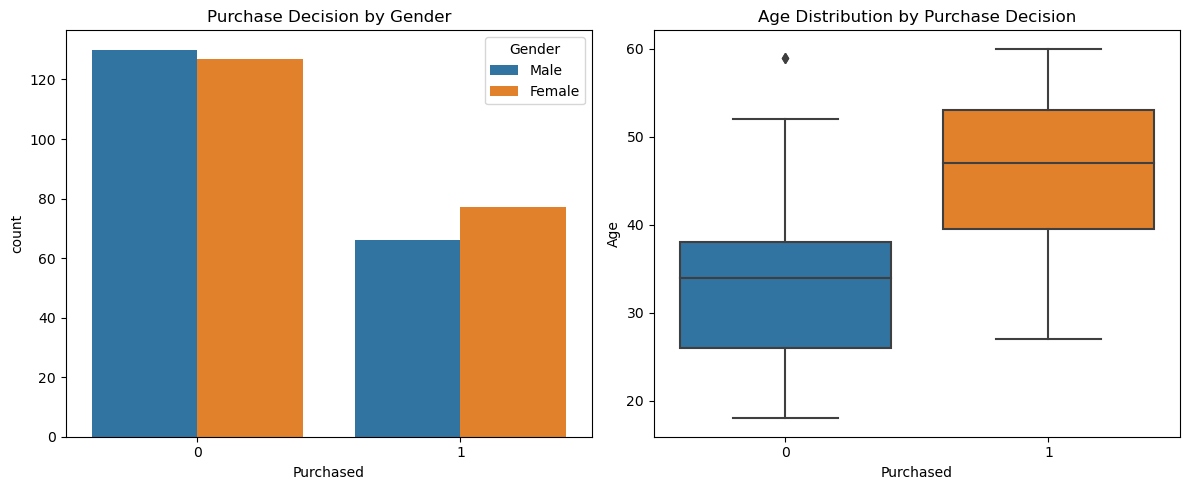

In [3]:
# Count plot for Purchased vs Gender
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Gender vs Purchased
sns.countplot(x="Purchased", hue="Gender", data=df, ax=ax[0])
ax[0].set_title("Purchase Decision by Gender")

# Age vs Purchased
sns.boxplot(x="Purchased", y="Age", data=df, ax=ax[1])
ax[1].set_title("Age Distribution by Purchase Decision")

plt.tight_layout()
plt.show()


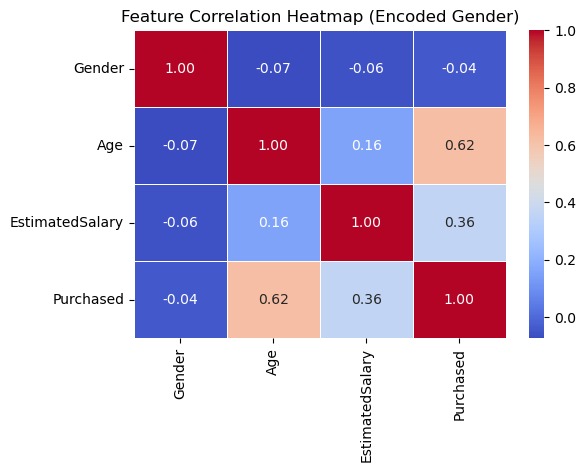

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,-0.060435,0.155238,1.000000,0.362083
Purchased,-0.042469,0.622454,0.362083,1.000000


In [5]:
# Encode Gender as numerical values (Male -> 1, Female -> 0)
df_encoded = df.copy()
df_encoded["Gender"] = df_encoded["Gender"].map({"Male": 1, "Female": 0})

# Recalculate correlation matrix
corr_matrix_encoded = df_encoded.drop(columns=["User ID"]).corr()

# Heatmap of correlations
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix_encoded, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Encoded Gender)")
plt.show()

corr_matrix_encoded


In [8]:
x=df.iloc[:,2:4]
y=df.iloc[:,-1].values

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [11]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy')
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [13]:
y_pred=classifier.predict(x_test)

<Axes: >

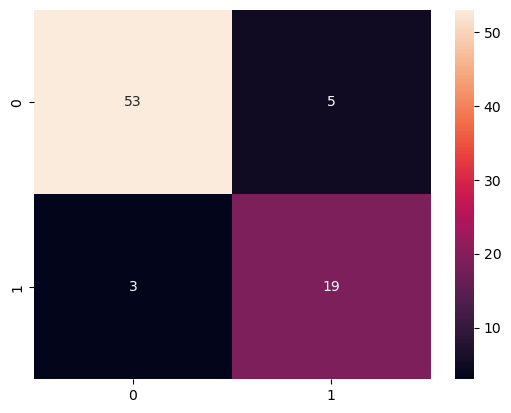

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm,annot=True)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9